# Predictive Analytics - Banking Customer Classification

# Business Objective & Understanding

We all know that, the best way to grow a business is by retaining existing customers and then acquire new customers. That’s why most of the companies give importance to retain existing customers and increase their presence by cross selling other products to them.

The business objective of this project is to analyze the success rate in customer retention through direct campaign marketing by a Portuguese Bank for which this data set pertains to. It is important to find what parameters define the outcome of the direct campaign and what parameters are a must for a positive outcome leading to a subscription. In order to increase the chance of their success, if a bank can predict who are the customers that are most likely to subscribe for their new program (here the program is term deposit).


# Data Understanding

The data set consists of direct marketing campaigning results from a Portuguese bank. The direct campaigning involves their existing customers that have either an account with some balance or personal loan or a housing loan. The data set includes the demographic information about such customers like their job status, marital status, educational details. It also includes direct call campaigning details like contact type, day & month of contact, how long the telephonic conversation took place along with previous campaigning results. As data set involves, only phone calls my research includes the effectiveness of the direct marketing campaign. 
Data set is available at the link - https://www.openml.org/d/1461


# Import required modules

In [1]:
# Importing required modules

import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for measuring accuracy, precision, recall, f1 and auc scores
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# for model deployment
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# Importing Data Set

In [2]:
# creating data file directory
import os
cwd = os.getcwd()
print(cwd)

datadir = os.path.join(cwd, 'Data')
datadirfile = os.path.join(datadir, 'bank-marketing.csv')
print(datadirfile)

C:\Users\nrrvlkp\Documents\M\680\DSC680\DSC680-Projects\Customer Behaviour Prediction
C:\Users\nrrvlkp\Documents\M\680\DSC680\DSC680-Projects\Customer Behaviour Prediction\Data\bank-marketing.csv


In [3]:
# importing data

bankdf = pd.read_csv(datadirfile)
bankdf.head()

V1            V2       V3         V4  V5    V6   V7   V8       V9  V10  \
0  58    management  married   tertiary  no  2143  yes   no  unknown    5   
1  44    technician   single  secondary  no    29  yes   no  unknown    5   
2  33  entrepreneur  married  secondary  no     2  yes  yes  unknown    5   
3  47   blue-collar  married    unknown  no  1506  yes   no  unknown    5   
4  33       unknown   single    unknown  no     1   no   no  unknown    5   

   V11  V12  V13  V14  V15      V16  Class  
0  may  261    1   -1    0  unknown      1  
1  may  151    1   -1    0  unknown      1  
2  may   76    1   -1    0  unknown      1  
3  may   92    1   -1    0  unknown      1  
4  may  198    1   -1    0  unknown      1

# Exploratory Data Analysis

In [4]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
V1       45211 non-null int64
V2       45211 non-null object
V3       45211 non-null object
V4       45211 non-null object
V5       45211 non-null object
V6       45211 non-null int64
V7       45211 non-null object
V8       45211 non-null object
V9       45211 non-null object
V10      45211 non-null int64
V11      45211 non-null object
V12      45211 non-null int64
V13      45211 non-null int64
V14      45211 non-null int64
V15      45211 non-null int64
V16      45211 non-null object
Class    45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [5]:
# Renaming columns appropriately
bankdf.columns = ['age',
'job',
'marital_status',
'education',
'default',
'balance',
'housing',
'loan',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'class']


In [6]:
bankdf.head()
# if need be the renamed data frame can be saved again in csv format. 

age           job marital_status  education default  balance housing loan  \
0   58    management        married   tertiary      no     2143     yes   no   
1   44    technician         single  secondary      no       29     yes   no   
2   33  entrepreneur        married  secondary      no        2     yes  yes   
3   47   blue-collar        married    unknown      no     1506     yes   no   
4   33       unknown         single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  class  
0  unknown    5   may       261         1     -1         0  unknown      1  
1  unknown    5   may       151         1     -1         0  unknown      1  
2  unknown    5   may        76         1     -1         0  unknown      1  
3  unknown    5   may        92         1     -1         0  unknown      1  
4  unknown    5   may       198         1     -1         0  unknown      1

In [7]:
bankdf.shape

(45211, 17)

In [8]:
bankdf.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous         class  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      1.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      1.000000  
25%       -1.000000      0.000000      1.000000  
50%       -1.000000      0.000000      1.000000  
75%       -1.000000      0.000000      1.000000  
max      871.000000    275.000000      2.000000

# Checking for missing values

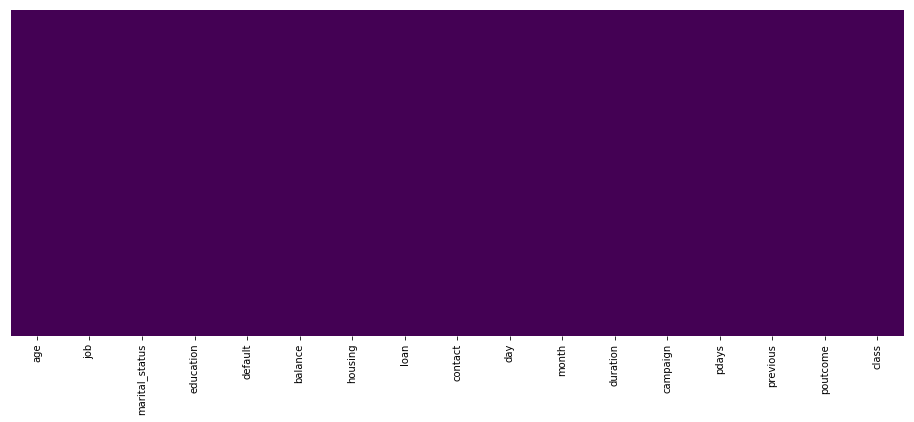

In [9]:
# checking heat map for missing values
plt.figure(figsize=(16, 6))
sns.heatmap(bankdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Checking for blank values for each column of dataframe
nullcols = bankdf.isnull().sum()
print(nullcols)


age               0
job               0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
class             0
dtype: int64


All columns are populated in this data set. 

In [11]:
# Getting list of categorical columns
#bankdf.select_dtypes(exclude=['int', 'float']).columns

In [12]:
# Defining fonts for plotting exploratory data analysis

titlefont = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 16,
        }

labelfont = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

# Exploring counts by each category (of categorical variables)

Let us the check the count of customers as per term subscription. Note that this is the actual target variable and expected to be in Boolean type.

Text(0.5, 1.0, 'Count of records by Customer Classification')

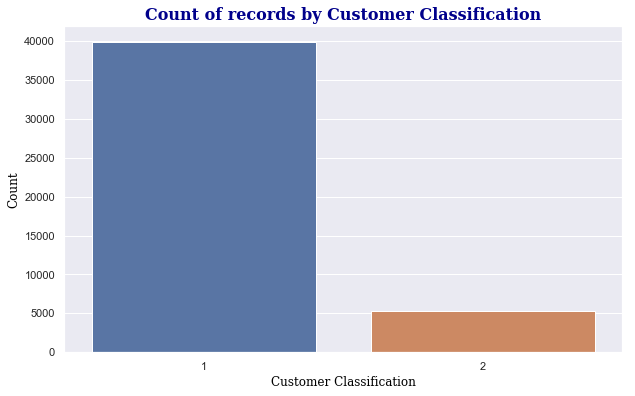

In [13]:
# Draw count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="class", data=bankdf)


plt.xlabel("Customer Classification", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Count of records by Customer Classification",fontdict=titlefont)

The class variable is supposed to be binary, instead it is having values - 1 or 2. This need to be tweaked to 0 or 1.

In [14]:
# Changing class variable values to 0 (no) or 1 (yes)

bankdf.loc[bankdf['class'] == 1, 'class'] = 0    # Changing all NO to 0
bankdf.loc[bankdf['class'] == 2, 'class'] = 1    # Changing all YES to 1

Text(0.5, 1.0, 'Count of records by Job')

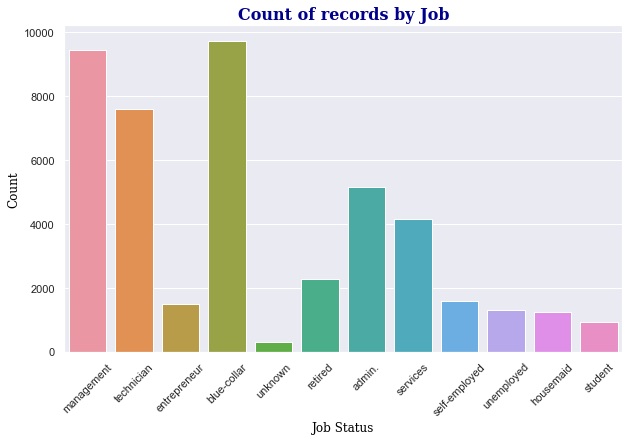

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="job", data=bankdf)

plt.xlabel("Job Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Job", fontdict=titlefont)

In [16]:
bankdf1 = bankdf.groupby(['job', 'class']).size().reset_index().pivot(columns='class', index='job', values=0)
bankdf1

class             0     1
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

Text(0.5, 1.0, 'Count of subscriptions by Job')

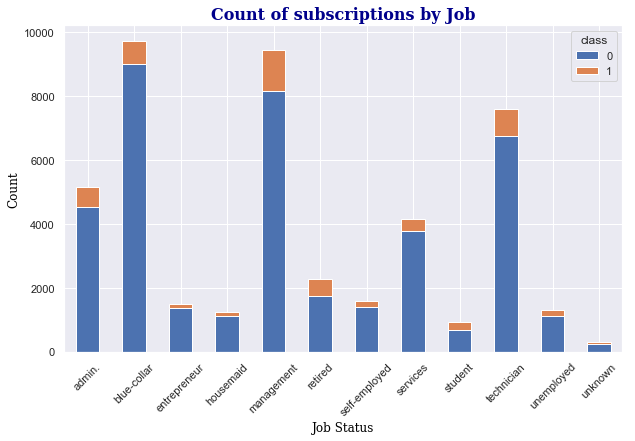

In [17]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf1.plot(kind='bar', stacked=True)

plt.xlabel("Job Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Job", fontdict=titlefont)


Top 3 job statuses among the current customers are blue-collar, management, and technician.

Text(0.5, 1.0, 'Count of records by Marital Status')

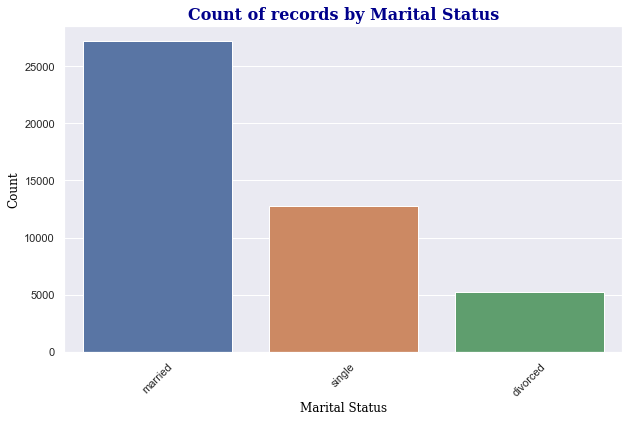

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="marital_status", data=bankdf)

plt.xlabel("Marital Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Count of records by Marital Status", fontdict=titlefont)


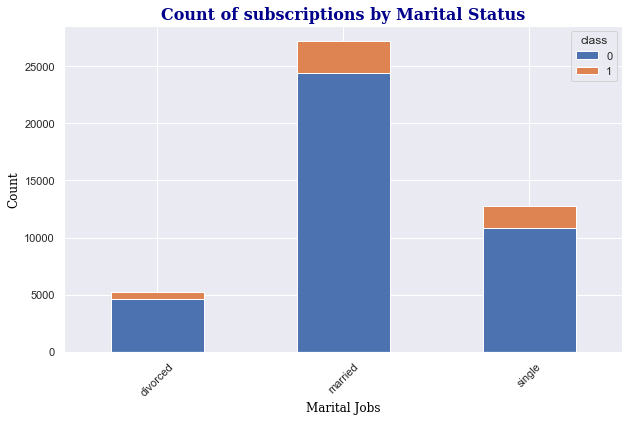

In [19]:
bankdf2 = bankdf.groupby(['marital_status', 'class']).size().reset_index().pivot(columns='class', index='marital_status', values=0)
bankdf2

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf2.plot(kind='bar', stacked=True)

plt.xlabel("Marital Jobs", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Marital Status", fontdict=titlefont)

plt.savefig('Maritalstatus.jpeg',
                    format='jpeg',
                    dpi=90)


Most of the current customers are married as clearly depicted in below bar plot.

Text(0.5, 1.0, 'Count of records by Education')

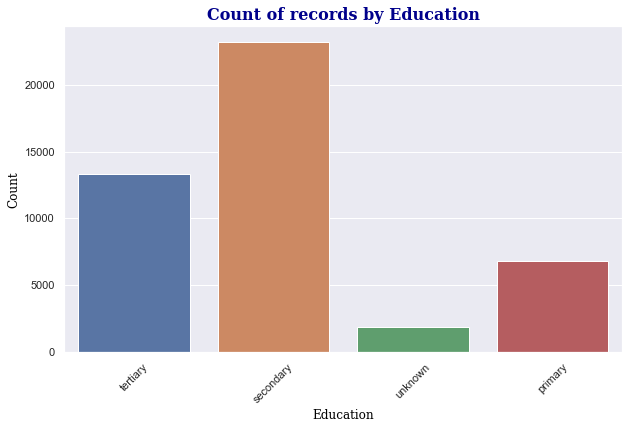

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="education", data=bankdf)

plt.xlabel("Education", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Count of records by Education", fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Education')

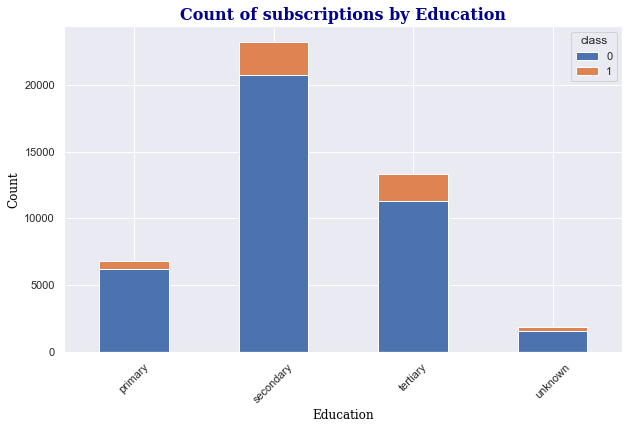

In [21]:
bankdf3 = bankdf.groupby(['education', 'class']).size().reset_index().pivot(columns='class', index='education', values=0)
bankdf3

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf3.plot(kind='bar', stacked=True)

plt.xlabel("Education", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Education", fontdict=titlefont)

Most of the customers have at least secondary education and tertiary education.

Text(0.5, 1.0, 'Count of records by Default Status')

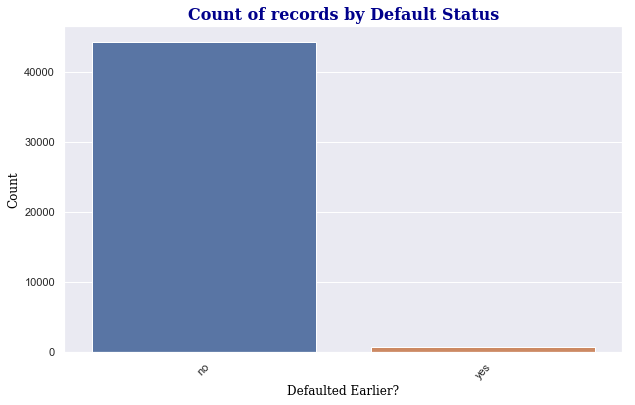

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="default", data=bankdf)

plt.xlabel("Defaulted Earlier?", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Default Status", fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Default status')

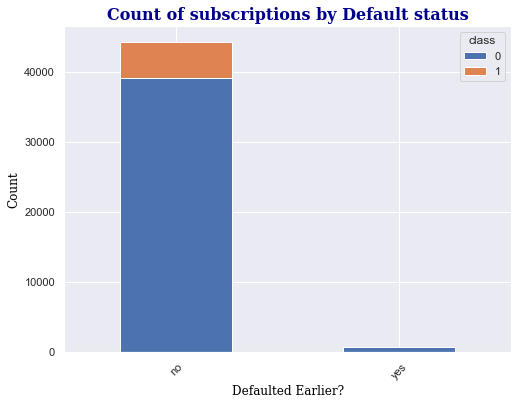

In [23]:
bankdf3 = bankdf.groupby(['default', 'class']).size().reset_index().pivot(columns='class', index='default', values=0)
bankdf3

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [8, 6]
bankdf3.plot(kind='bar', stacked=True)

plt.xlabel("Defaulted Earlier?", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Default status", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Housing Loan Status')

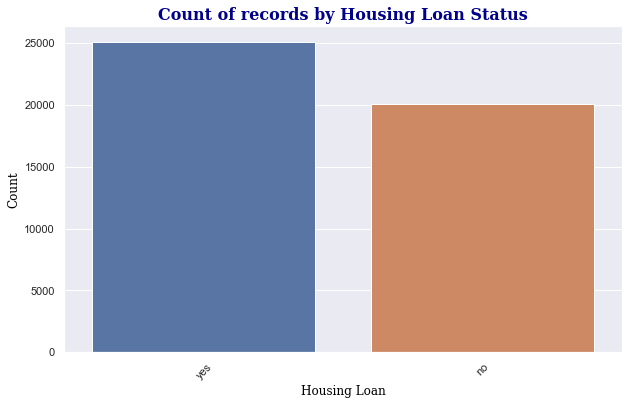

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="housing", data=bankdf)

plt.xlabel("Housing Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Housing Loan Status",fontdict=titlefont)



Text(0.5, 1.0, 'Count of subscriptions by Housing Loan')

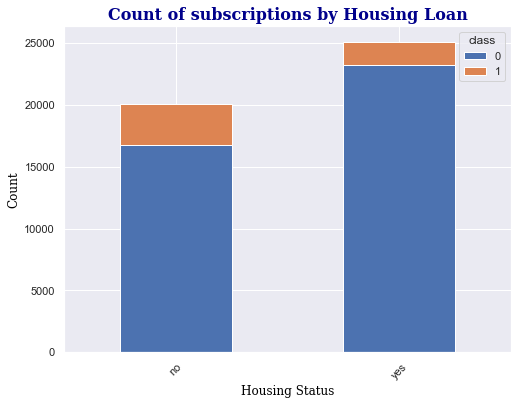

In [25]:
bankdf4 = bankdf.groupby(['housing', 'class']).size().reset_index().pivot(columns='class', index='housing', values=0)
bankdf4

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [8, 6]
bankdf4.plot(kind='bar', stacked=True)

plt.xlabel("Housing Status", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Housing Loan", fontdict=titlefont)

Most of the current customer bunch does have housing loan with the bank and looks like customers that do not have housing loan with the bank are more likely to subscribe for term deposit.

Text(0.5, 1.0, 'Count of records by Personal Loan Status')

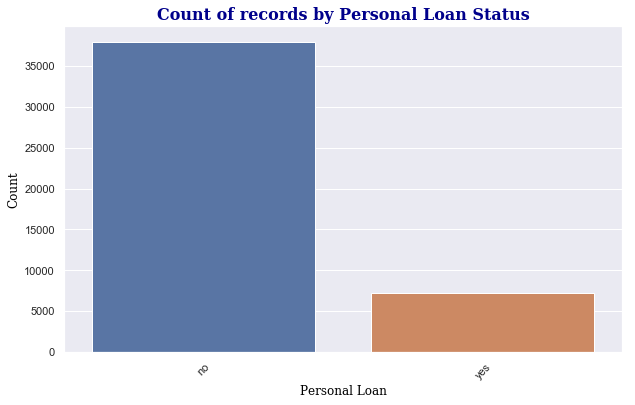

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="loan", data=bankdf)

plt.xlabel("Personal Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Personal Loan Status",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Personal Loan')

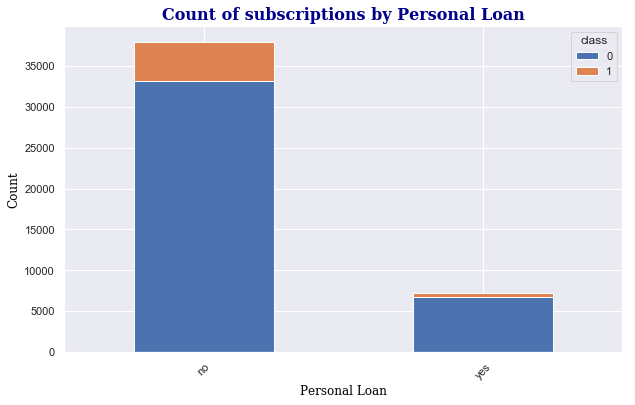

In [27]:
bankdf5 = bankdf.groupby(['loan', 'class']).size().reset_index().pivot(columns='class', index='loan', values=0)
bankdf5

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf5.plot(kind='bar', stacked=True)

plt.xlabel("Personal Loan", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Personal Loan", fontdict=titlefont)

Most of the current customer bunch does not have personal loan with the bank and looks like customers that do not have personal loan with the bank are more likely to subscribe for term deposit.

Text(0.5, 1.0, 'Count of records by Contact Method')

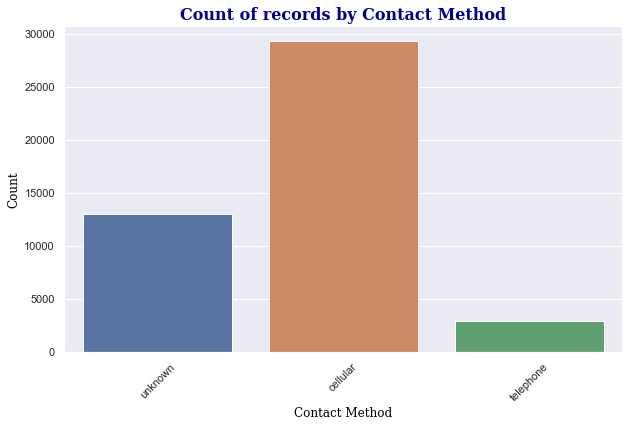

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="contact", data=bankdf)


plt.xlabel("Contact Method", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Contact Method",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Contact Method')

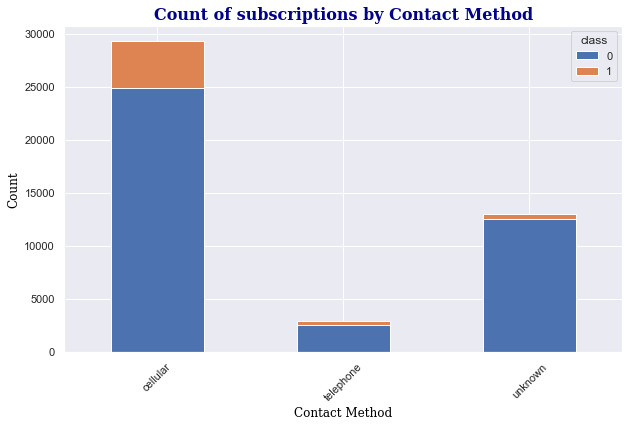

In [29]:
bankdf6 = bankdf.groupby(['contact', 'class']).size().reset_index().pivot(columns='class', index='contact', values=0)
bankdf6

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf6.plot(kind='bar', stacked=True)

plt.xlabel("Contact Method", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Contact Method", fontdict=titlefont)

Most of the customers prefer cellular phone as the primary contact method. It is understandable as cell phones offer flexibility to be carried all the time.  

Text(0.5, 1.0, 'Count of records by Previous Campaign Outcome')

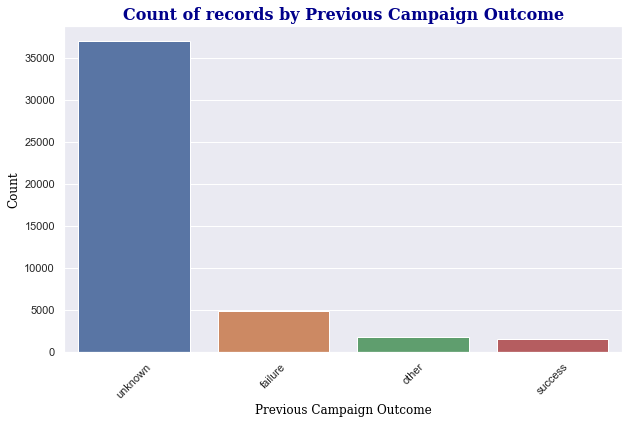

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="poutcome", data=bankdf)


plt.xlabel("Previous Campaign Outcome", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of records by Previous Campaign Outcome",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Previous Campaign Outcome')

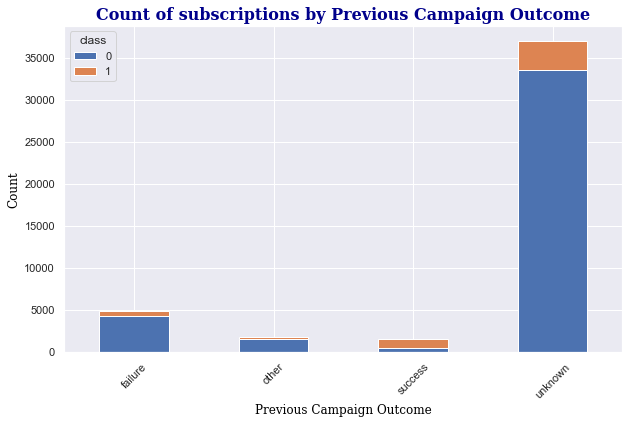

In [31]:
bankdf7 = bankdf.groupby(['poutcome', 'class']).size().reset_index().pivot(columns='class', index='poutcome', values=0)
bankdf7

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf7.plot(kind='bar', stacked=True)

plt.xlabel("Previous Campaign Outcome", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Previous Campaign Outcome", fontdict=titlefont)

Text(0.5, 1.0, 'Count of records by Month')

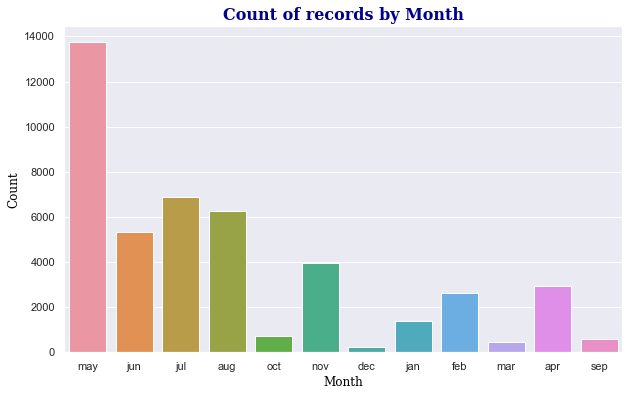

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="month", data=bankdf)


plt.xlabel("Month", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Count of records by Month",fontdict=titlefont)

Text(0.5, 1.0, 'Count of subscriptions by Month')

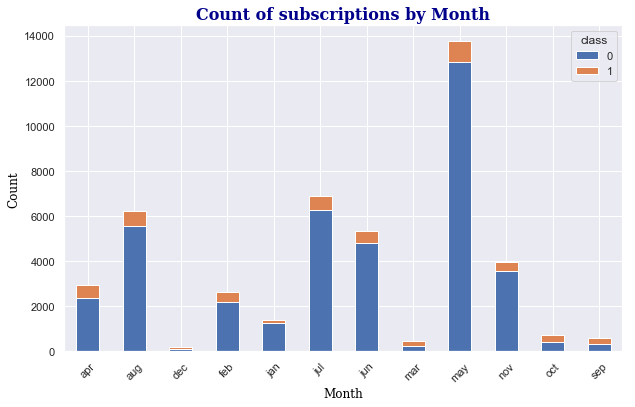

In [33]:
bankdf8 = bankdf.groupby(['month', 'class']).size().reset_index().pivot(columns='class', index='month', values=0)
bankdf8

sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = [10, 6]
bankdf8.plot(kind='bar', stacked=True)

plt.xlabel("Month", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.xticks(rotation=45)
plt.title("Count of subscriptions by Month", fontdict=titlefont)

The class variable is supposed to be binary, instead it is having values - 1 or 2. This need to be tweaked to 0 or 1. 

Text(0.5, 1.0, 'Balances distribution')

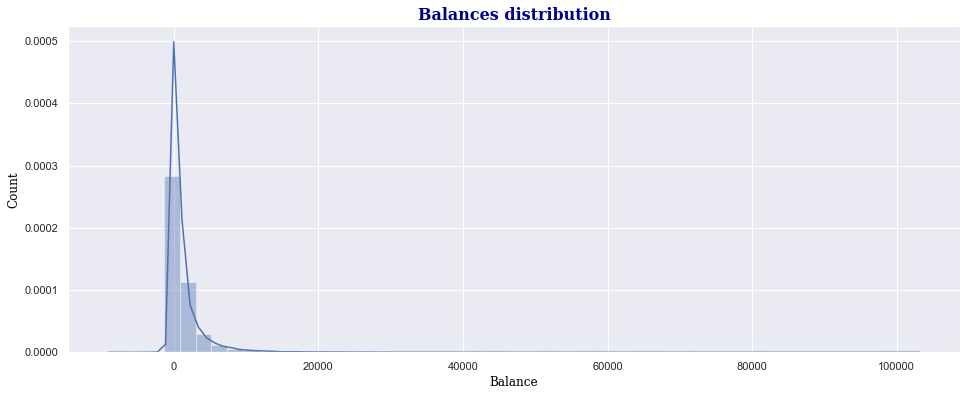

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
sns.distplot(bankdf.balance, kde=True,color="b")

plt.xlabel("Balance", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Balances distribution", fontdict=titlefont)

Balance distribution of the banks current customers is highly skewed with long tail towards higher end of the scale.  We can infer that most of the current customers maintain less than 10,000 balance. 

Text(0.5, 1.0, 'Balances distribution')

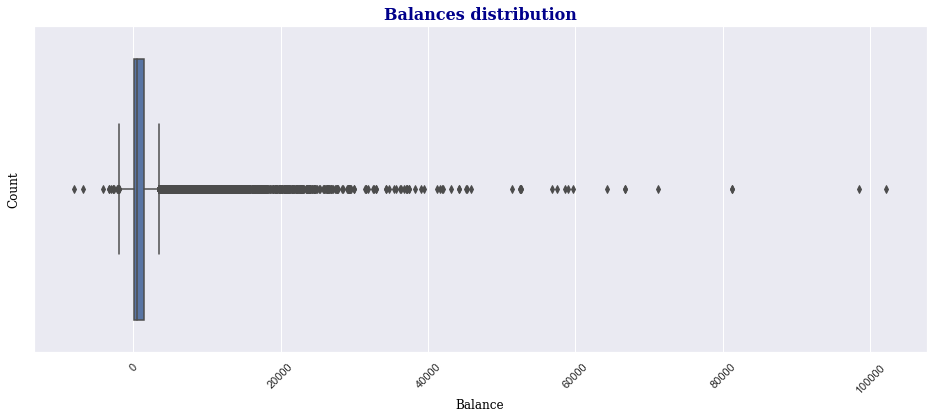

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="balance", data=bankdf)

plt.xlabel("Balance", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Balances distribution", fontdict=titlefont)


Text(0.5, 1.0, 'Call Duration distribution')

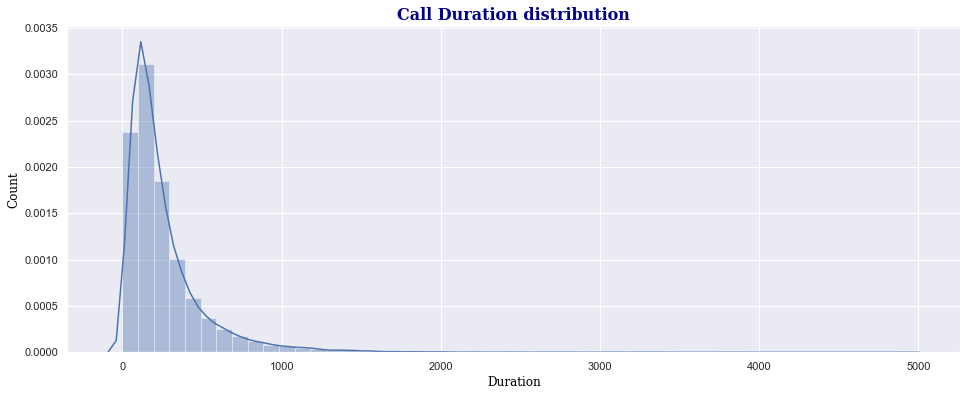

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
sns.distplot(bankdf.duration, kde=True,color="b")

plt.xlabel("Duration", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)
plt.title("Call Duration distribution", fontdict=titlefont)

Most of the current customers have spoken for less than 500 seconds during the last call campaign. Which means, the campaign representatives on average must spend less than 10 minutes, to get to know either the customer is interested or not in subscribing to term deposit program. 

Text(0.5, 1.0, 'Duration distribution')

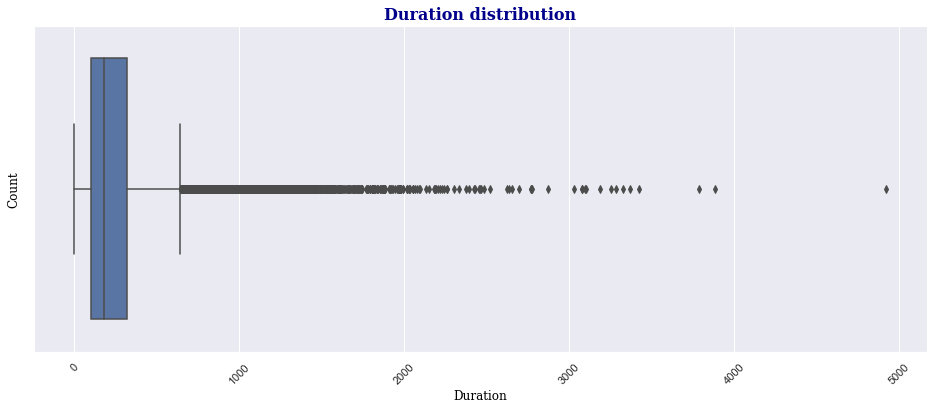

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="duration", data=bankdf)

plt.xlabel("Duration", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Duration distribution", fontdict=titlefont)


Text(0.5, 1.0, 'Previous contacted date')

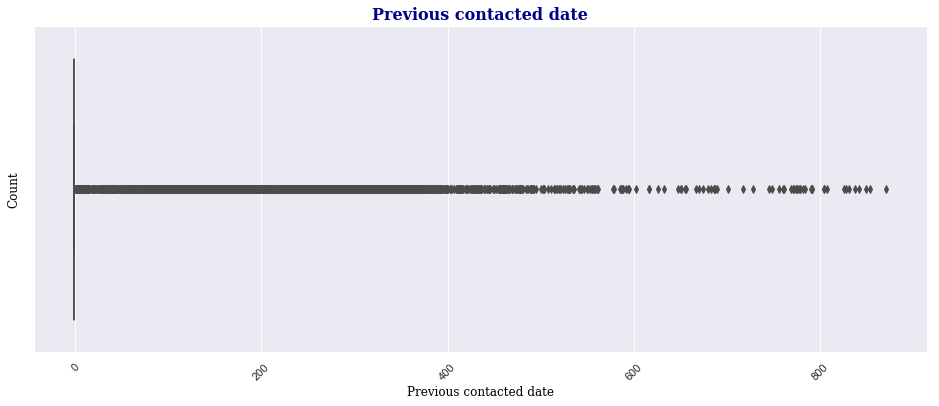

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="pdays", data=bankdf)

plt.xlabel("Previous contacted date", fontdict=labelfont)
plt.ylabel("Count", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Previous contacted date", fontdict=titlefont)


#  Feature Engineering

The input features currently have lot of categorical  variables. Categorical variables need to be encoded to fit the predictive models. Here, I used pandas – getdummies() function to create dummy variables for all the categorical variables. 

In [39]:
bankdf_wdummy = pd.get_dummies(bankdf)
bankdf_wdummy.head()

age  balance  day  duration  campaign  pdays  previous  class  job_admin.  \
0   58     2143    5       261         1     -1         0      0           0   
1   44       29    5       151         1     -1         0      0           0   
2   33        2    5        76         1     -1         0      0           0   
3   47     1506    5        92         1     -1         0      0           0   
4   33        1    5       198         1     -1         0      0           0   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0                0  ...          0          0          1          0   
1                0  ...          0          0          1          0   
2                0  ...          0          0          1          0   
3                1  ...          0          0          1          0   
4                0  ...          0          0          1          0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0          0                 0               0                 0   
1          0          0                 0               0                 0   
2          0          0                 0               0                 0   
3          0          0                 0               0                 0   
4          0          0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 52 columns]

In [40]:
bankdf_wdummy.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'class', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

To avoid dummy variable trap, one dummy variable for each categorical variable should be removed. Below dummy variable columns are removed

'job_unknown', 'marital_status_divorced','education_unknown','default_no','housing_no', 'loan_no', 
'month_dec','contact_unknown', 'poutcome_unknown'

In [41]:
# Resolving Dummy Variable Trap
bankdf_wdummy_final = bankdf_wdummy[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'class', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_status_married', 'marital_status_single', 
       'education_primary', 'education_secondary',
       'education_tertiary',  'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular',
       'contact_telephone',  'month_apr', 'month_aug',
       'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       ]]


In [42]:
bankdf_wdummy_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'class', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_status_married', 'marital_status_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [43]:
bankdf_wdummy_final.shape

(45211, 43)

# Feature Selection

In [44]:
features = bankdf_wdummy_final.loc[ : , bankdf_wdummy_final.columns != 'class' ]
features.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1     -1         0           0   
1   44       29    5       151         1     -1         0           0   
2   33        2    5        76         1     -1         0           0   
3   47     1506    5        92         1     -1         0           0   
4   33        1    5       198         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          0   
2                0                 1  ...          0          0          0   
3                1                 0  ...          0          0          0   
4                0                 0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0          1          0          0          0                 0   
1          1          0          0          0                 0   
2          1          0          0          0                 0   
3          1          0          0          0                 0   
4          1          0          0          0                 0   

   poutcome_other  poutcome_success  
0               0                 0  
1               0                 0  
2               0                 0  
3               0                 0  
4               0                 0  

[5 rows x 42 columns]

In [45]:
target = bankdf_wdummy_final['class']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

Extra Trees Classifier (Extremely Randomized Tress):
    
Random split of random subset features

Bootstrap = False, samples without replacement

Low Variance

In [46]:
# feature selection
fsmodel = ExtraTreesClassifier(n_estimators=10)
fsmodel.fit(features, target)
impfeatures = fsmodel.feature_importances_
print(impfeatures)
print(features.columns)

[0.08804512 0.08967869 0.09485463 0.22974529 0.05958748 0.03370015
 0.02063375 0.00999566 0.00786066 0.00481167 0.00378646 0.01077006
 0.00694113 0.00580787 0.00701489 0.00557755 0.01123597 0.00548564
 0.01358124 0.01122776 0.00737564 0.01339271 0.01127342 0.00287389
 0.02602015 0.01266275 0.01695384 0.00502434 0.00993803 0.00770306
 0.00666472 0.00505189 0.0072089  0.0108816  0.01386599 0.00852458
 0.00724171 0.01212142 0.01062576 0.01161589 0.00632218 0.06631588]
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed',
       'marital_status_married', 'marital_status_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 

In [47]:
indices = np.argsort(impfeatures)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], impfeatures[indices[f]]))

Feature ranking:
1. feature 3 (0.229745)
2. feature 2 (0.094855)
3. feature 1 (0.089679)
4. feature 0 (0.088045)
5. feature 41 (0.066316)
6. feature 4 (0.059587)
7. feature 5 (0.033700)
8. feature 24 (0.026020)
9. feature 6 (0.020634)
10. feature 26 (0.016954)
11. feature 34 (0.013866)
12. feature 18 (0.013581)
13. feature 21 (0.013393)
14. feature 25 (0.012663)
15. feature 37 (0.012121)
16. feature 39 (0.011616)
17. feature 22 (0.011273)
18. feature 16 (0.011236)
19. feature 19 (0.011228)
20. feature 33 (0.010882)
21. feature 11 (0.010770)
22. feature 38 (0.010626)
23. feature 7 (0.009996)
24. feature 28 (0.009938)
25. feature 35 (0.008525)
26. feature 8 (0.007861)
27. feature 29 (0.007703)
28. feature 20 (0.007376)
29. feature 36 (0.007242)
30. feature 32 (0.007209)
31. feature 14 (0.007015)
32. feature 12 (0.006941)
33. feature 30 (0.006665)
34. feature 40 (0.006322)
35. feature 13 (0.005808)
36. feature 15 (0.005578)
37. feature 17 (0.005486)
38. feature 31 (0.005052)
39. feature 2

## Converting feature importance metric into a data frame for easy read

In [48]:
impfeatdf = pd.DataFrame(features.columns, impfeatures).reset_index()
impfeatdf.rename(columns = {'index':'featureimportance',0: 'featurename'}, inplace = True)
impfeatdf.sort_values('featureimportance',ascending=False)
#impfeatdf.sort_values('impfeatures',ascending=False)

featureimportance             featurename
3            0.229745                duration
2            0.094855                     day
1            0.089679                 balance
0            0.088045                     age
41           0.066316        poutcome_success
4            0.059587                campaign
5            0.033700                   pdays
24           0.026020             housing_yes
6            0.020634                previous
26           0.016954        contact_cellular
34           0.013866               month_mar
18           0.013581  marital_status_married
21           0.013393     education_secondary
25           0.012663                loan_yes
37           0.012121               month_oct
39           0.011616        poutcome_failure
22           0.011273      education_tertiary
16           0.011236          job_technician
19           0.011228   marital_status_single
33           0.010882               month_jun
11           0.010770          job_management
38           0.010626               month_sep
7            0.009996              job_admin.
28           0.009938               month_apr
35           0.008525               month_may
8            0.007861         job_blue-collar
29           0.007703               month_aug
20           0.007376       education_primary
36           0.007242               month_nov
32           0.007209               month_jul
14           0.007015            job_services
12           0.006941             job_retired
30           0.006665               month_feb
40           0.006322          poutcome_other
13           0.005808       job_self-employed
15           0.005578             job_student
17           0.005486          job_unemployed
31           0.005052               month_jan
27           0.005024       contact_telephone
9            0.004812        job_entrepreneur
10           0.003786           job_housemaid
23           0.002874             default_yes

# Plotting Cummulative Importance

In [49]:
# Cumulative importances
impfeatdf['cum_imp'] = np.cumsum(impfeatdf.featureimportance)
impfeatdf

featureimportance             featurename   cum_imp
0            0.088045                     age  0.088045
1            0.089679                 balance  0.177724
2            0.094855                     day  0.272578
3            0.229745                duration  0.502324
4            0.059587                campaign  0.561911
5            0.033700                   pdays  0.595611
6            0.020634                previous  0.616245
7            0.009996              job_admin.  0.626241
8            0.007861         job_blue-collar  0.634101
9            0.004812        job_entrepreneur  0.638913
10           0.003786           job_housemaid  0.642700
11           0.010770          job_management  0.653470
12           0.006941             job_retired  0.660411
13           0.005808       job_self-employed  0.666219
14           0.007015            job_services  0.673234
15           0.005578             job_student  0.678811
16           0.011236          job_technician  0.690047
17           0.005486          job_unemployed  0.695533
18           0.013581  marital_status_married  0.709114
19           0.011228   marital_status_single  0.720342
20           0.007376       education_primary  0.727717
21           0.013393     education_secondary  0.741110
22           0.011273      education_tertiary  0.752383
23           0.002874             default_yes  0.755257
24           0.026020             housing_yes  0.781277
25           0.012663                loan_yes  0.793940
26           0.016954        contact_cellular  0.810894
27           0.005024       contact_telephone  0.815918
28           0.009938               month_apr  0.825856
29           0.007703               month_aug  0.833560
30           0.006665               month_feb  0.840224
31           0.005052               month_jan  0.845276
32           0.007209               month_jul  0.852485
33           0.010882               month_jun  0.863367
34           0.013866               month_mar  0.877233
35           0.008525               month_may  0.885757
36           0.007242               month_nov  0.892999
37           0.012121               month_oct  0.905120
38           0.010626               month_sep  0.915746
39           0.011616        poutcome_failure  0.927362
40           0.006322          poutcome_other  0.933684
41           0.066316        poutcome_success  1.000000

Text(0.5, 1.0, 'Cumulative Importances')

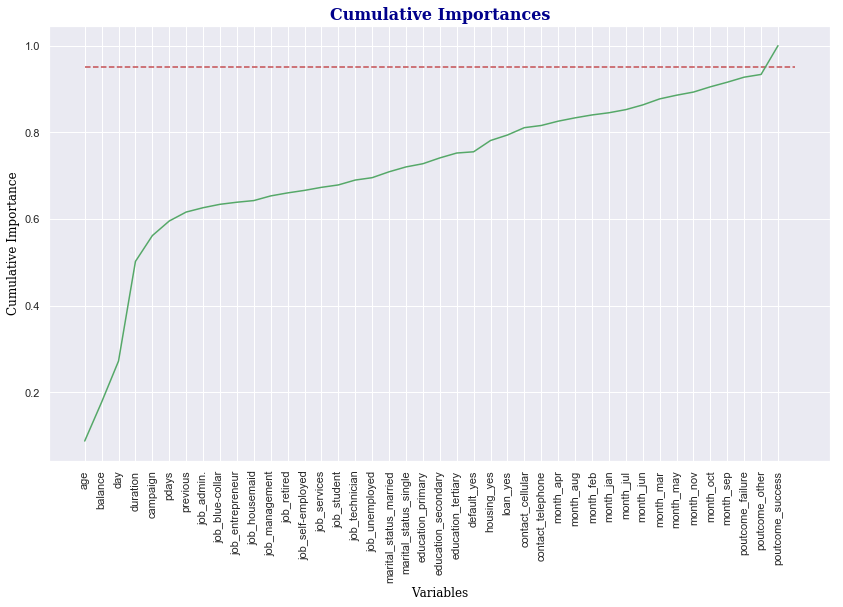

In [50]:

xvalues = list(range(len(list(impfeatdf.featureimportance))))

plt.figure(figsize=(14, 8))

# Make a line graph
plt.plot(xvalues, impfeatdf.cum_imp, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(impfeatdf.featureimportance), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(xvalues, impfeatdf.featurename, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variables', fontdict=labelfont)
plt.ylabel('Cumulative Importance', fontdict=labelfont)
plt.title('Cumulative Importances', fontdict=titlefont)

# Feature Selection without dummy encoding

In [51]:
features_nod = bankdf.loc[ : , bankdf.columns != 'class' ]
features_nod.head()

age           job marital_status  education default  balance housing loan  \
0   58    management        married   tertiary      no     2143     yes   no   
1   44    technician         single  secondary      no       29     yes   no   
2   33  entrepreneur        married  secondary      no        2     yes  yes   
3   47   blue-collar        married    unknown      no     1506     yes   no   
4   33       unknown         single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1         0  unknown  
4  unknown    5   may       198         1     -1         0  unknown

In [52]:
target_nod = bankdf['class' ]
target_nod.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Building Models

In terms of modelling perspective, the business goal is to define a predictive model involving binary classification of customers into 2 categories – 

1) Customers that might open term deposit account with the bank after the campaign.

2) Customers that will not open term deposit account with the bank.

This classification really helps banks to identify the customers that they can concentrate their campaigning resources on such that it gives them maximum chance to succeed in their campaign resulting in more term deposit accounts (indirectly increasing their program’s success rate).  


# Why Random Forest?


Random Forest is an ensemble of decision trees.

1) To begin with, our data has unbalanced classes and Random Forest handles unbalanced data well by minimizing the overall error rate.

2) At each random split of decision tree, the model picks random subset of features, which reduces the correlation between the features selected improving the variance of the model.

3) Random Forest is not affected with the presence of outliers and non- linear data. In the exploratory data analysis, we have observed that the variable ‘balance’ has outliers. By selecting Random Forest, the presence of outliers is negated.


In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 1)

In [54]:
print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

(33908, 42)
(33908,)
(11303, 42)
(11303,)


Creating Base model with 200 estimators (number of trees), class weight = balanced.


In [55]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=1,           # for consistent results
                                      n_estimators = 200,       # number of tress in forest
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced"   # for handling imbalanced classes
                                     ) 
# Train model
basemodel = randomforest.fit(X_train, y_train)

In [56]:
# Calculate feature importances
importances = basemodel.feature_importances_
importances

array([0.07837897, 0.08089709, 0.06807511, 0.35146214, 0.03490439,
       0.03641677, 0.02465697, 0.0073009 , 0.00873987, 0.00328827,
       0.00246237, 0.00773345, 0.00464631, 0.00345283, 0.00529114,
       0.00412386, 0.00797945, 0.0033642 , 0.01021642, 0.00865501,
       0.00627292, 0.00945216, 0.00905967, 0.00134773, 0.02880868,
       0.01021228, 0.02592884, 0.00566059, 0.01136838, 0.01000693,
       0.00802238, 0.00485911, 0.00926601, 0.00995869, 0.01194849,
       0.01460959, 0.00789095, 0.01261631, 0.00674891, 0.00693136,
       0.00306996, 0.03391456])

In [57]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
indices

array([ 3,  1,  0,  2,  5,  4, 41, 24, 26,  6, 35, 37, 34, 28, 18, 25, 29,
       33, 21, 32, 22,  8, 19, 30, 16, 36, 11,  7, 39, 38, 20, 27, 14, 31,
       12, 15, 13, 17,  9, 40, 10, 23], dtype=int64)

In [58]:
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]
print(names)

['duration', 'balance', 'age', 'day', 'pdays', 'campaign', 'poutcome_success', 'housing_yes', 'contact_cellular', 'previous', 'month_may', 'month_oct', 'month_mar', 'month_apr', 'marital_status_married', 'loan_yes', 'month_aug', 'month_jun', 'education_secondary', 'month_jul', 'education_tertiary', 'job_blue-collar', 'marital_status_single', 'month_feb', 'job_technician', 'month_nov', 'job_management', 'job_admin.', 'poutcome_failure', 'month_sep', 'education_primary', 'contact_telephone', 'job_services', 'month_jan', 'job_retired', 'job_student', 'job_self-employed', 'job_unemployed', 'job_entrepreneur', 'poutcome_other', 'job_housemaid', 'default_yes']


In [59]:
# View out-of-bag-error
randomforest.oob_score_
# 0.9025303763123746 for 200 estimators

0.9025303763123746

In [60]:
# Predicting the target variable - class
y_pred = basemodel.predict(X_test)

In [61]:
# Get predicted probabilities
y_prob = basemodel.predict_proba(X_test)[:,1]

In [62]:
basemodel.predict_proba(X_test)[:,1]

array([0.005, 0.   , 0.255, ..., 0.17 , 0.375, 0.005])

In [63]:
#basemodel.predict_proba(X_test)

# Model Evaluation

In [64]:
# Get accuracy score
randomforest.score(X_test, y_test)

0.9045386180660002

In [65]:
# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[9791,  207],
       [ 872,  433]], dtype=int64)

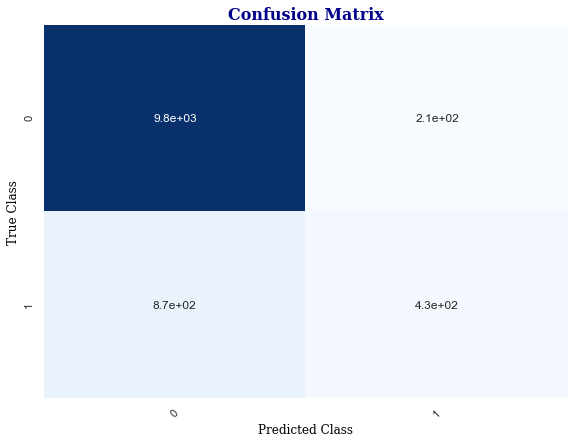

In [66]:
# Create pandas dataframe
dataframe = pd.DataFrame(matrix) #, index=class_names, columns=class_names)


# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.xlabel("Predicted Class", fontdict=labelfont)
plt.ylabel("True Class", fontdict=labelfont)

plt.xticks(rotation=45)
plt.title("Confusion Matrix" , fontdict=titlefont)
plt.show()

In [67]:
# printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9998
           1       0.68      0.33      0.45      1305

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.80      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



In [68]:
def fn_multiclass_metrics(actual_label, predicted_label):
    """
    function that takes acutal labels and predicted labels and returns
    accuracy, auc, precision, recall and f1 scores
    average = 'weighted' for multi class classification
    """
    accuracy = accuracy_score(actual_label, predicted_label)
    precision = precision_score(actual_label, predicted_label, average = 'weighted')
    recall = recall_score(actual_label, predicted_label, average = 'weighted')
    f1 = f1_score(actual_label, predicted_label, average = 'weighted')

    return (accuracy, precision, recall, f1)

In [69]:
acc, prec, recall, f1 = fn_multiclass_metrics(y_test, y_pred)

acc, prec, recall, f1


(0.9045386180660002,
 0.8903208445956925,
 0.9045386180660002,
 0.8897556560886072)

In [70]:
basemodel.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)>

As it is a binary classification problem AOC Curve would be a good evaluation metric


In [71]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
false_positive_rate, true_positive_rate, thresholds 

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00020004e-04,
        2.00040008e-04, 2.00040008e-04, 3.00060012e-04, 3.00060012e-04,
        3.00060012e-04, 3.00060012e-04, 6.00120024e-04, 6.00120024e-04,
        6.00120024e-04, 6.00120024e-04, 8.00160032e-04, 8.00160032e-04,
        9.00180036e-04, 1.00020004e-03, 1.10022004e-03, 1.20024005e-03,
        1.20024005e-03, 1.30026005e-03, 1.40028006e-03, 1.40028006e-03,
        1.40028006e-03, 1.60032006e-03, 1.70034007e-03, 1.70034007e-03,
        1.90038008e-03, 2.00040008e-03, 2.10042008e-03, 2.20044009e-03,
        2.30046009e-03, 2.60052010e-03, 2.80056011e-03, 2.90058012e-03,
        3.00060012e-03, 3.20064013e-03, 3.20064013e-03, 3.40068014e-03,
        3.70074015e-03, 3.90078016e-03, 4.20084017e-03, 4.60092018e-03,
        4.80096019e-03, 5.30106021e-03, 5.60112022e-03, 5.80116023e-03,
        6.10122024e-03, 6.60132026e-03, 6.90138028e-03, 7.00140028e-03,
        7.50150030e-03, 7.80156031e-03, 8.10162032e-03, 8.501700

In [72]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9317289894760562

In [73]:
def plotroc(false_positive_rate, true_positive_rate):

    """
    A function that takes false positive rate and true positive rate for plotting ROC curve
    Returns: none
    Expected o/p: ROC plot
    """

    # Plot ROC curve
    plt.figure(figsize=(12, 8))
    plt.title("Receiver Operating Characteristic", fontdict=titlefont)
    plt.plot(false_positive_rate, true_positive_rate,  label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel("True Positive Rate" , fontdict=labelfont)
    plt.xlabel("False Positive Rate", fontdict=labelfont)
    plt.legend(loc="lower right")
    plt.show()

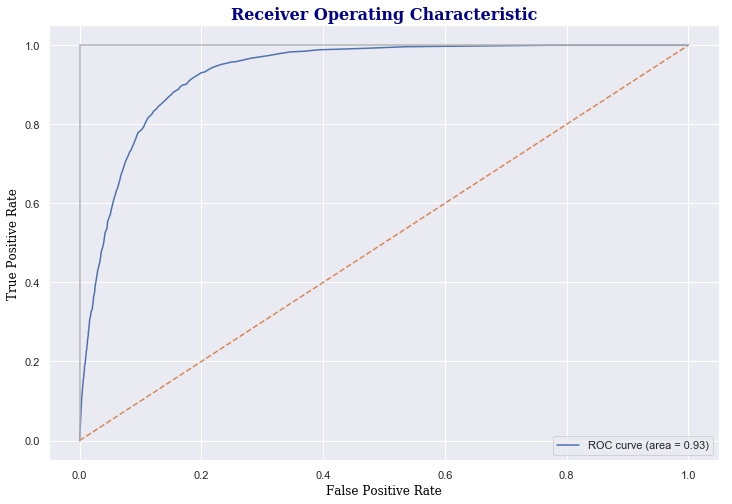

In [74]:
# Plot ROC curve
plotroc(false_positive_rate, true_positive_rate)

AUC of 0.93172, indicates that there is 94% chance the model separates between positive class and negative class.

Let us see if it can be further improved with some model tuning. 

In [75]:
# Calculate area under curve
roc_auc_score(y_test, y_prob)

0.9317289894760562

# Model Tuning

Using GridSearchCV which tries every combination of parameter given in the parameter grid, we can find out the best parameters.  Though we might get better accuracy with this approach, it could lot of time to search through all parameters. So, we need to be cautious consider the tradeoff between performance and accuracy before defining the parameters for GridSearchCV.


In [80]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 250, 500, 1000, 2000],
    "criterion": ["gini", "entropy"],
     }

# Create a default rf model
rf = RandomForestClassifier(random_state=1,           # for consistent results
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced" )
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [81]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.2min finished


{'criterion': 'entropy', 'n_estimators': 2000}

In [82]:
best_grid = grid_search.best_estimator_
print(best_grid)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)


In [83]:
def evaluate(model, X_test, y_test):
    
    """
    function that takes model, test features and test labels 
    prints the model performance metrics
    returns none
    
    """
    print("\n Metrics for model with below parameters :\n")
    print(model.get_params)
    
    # Predicting the target variable - class
    y_pred = model.predict(X_test)
    
    # Get accuracy score
    print("\n Model score :\n")
    print(model.score(X_test, y_test))
    
    acc, prec, recall, f1 = fn_multiclass_metrics(y_test, y_pred)
    
    # printing classification report
    print("\n Classification Report :\n")
    print(classification_report(y_test, y_pred))
    
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    #print( "false_positive_rate, true_positive_rate, thresholds : " )
    plotroc(false_positive_rate, true_positive_rate)
    
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\n ROC AUC :")
    print(roc_auc)
    

    
    return 


 Metrics for model with below parameters :

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)>

 Model score :

0.9054233389365655

 Classification Report :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9998
           1       0.67      0.35      0.46      1305

   micro avg       0.91      0.91      0.91     11303
   macro avg       0.80      0.67      0.71     11303
weighted avg       0.89      0.91      0.89     11303



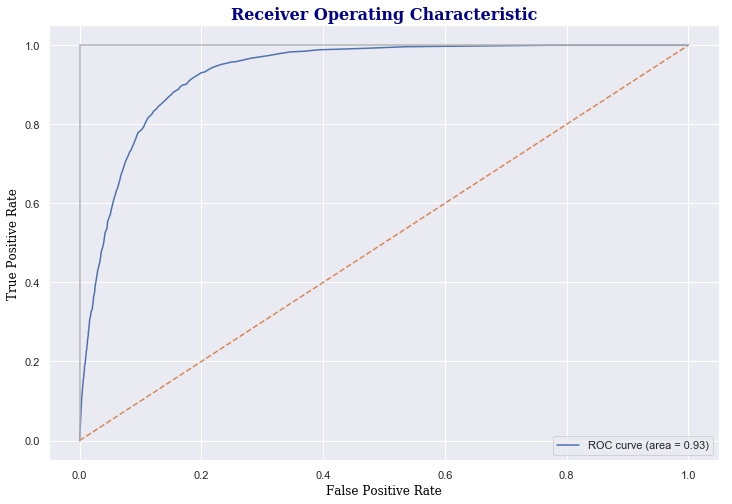


 ROC AUC :
0.9317289894760562


In [84]:
grid_accuracy = evaluate(best_grid, X_test, y_test)

#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


 Metrics for model with below parameters :

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)>

 Model score :

0.9045386180660002

 Classification Report :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9998
           1       0.68      0.33      0.45      1305

   micro avg       0.90      0.90      0.90     11303
   macro avg       0.80      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



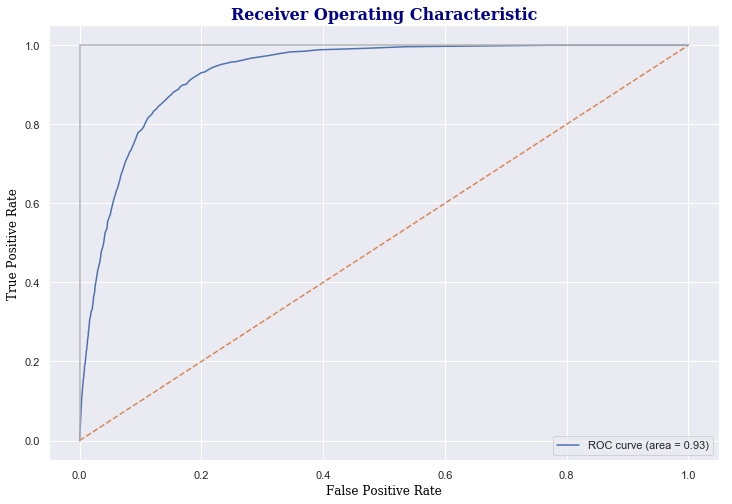


 ROC AUC :
0.9317289894760562


In [85]:
base_accuracy = evaluate(basemodel,  X_test, y_test)

# Model Deployment

Once best parameters are obtained through proper tuning new model is created with the best parameters

In [88]:
print(best_grid)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)


Create the model with best parameters obtained from  tuning.

Save the model using joblib module as a pickle.

Deploy the pickle on the server and use it for fitting new unseen data.


In [90]:
# Create random forest classifier object
bestmodel = RandomForestClassifier(random_state=1,           # for consistent results
                                      n_estimators = 2000,       # number of tress in forest
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced",   # for handling imbalanced classes
                                      criterion='entropy'
                                     ) 


In [93]:
# Save the model as a pickle in a file 
joblib.dump(bestmodel, 'Model\\bestmodel.pkl') 

['Model\\bestmodel.pkl']

In [95]:
# Load the model from the file 
tunedmodel_from_joblib = joblib.load('Model\\bestmodel.pkl') 


In [96]:
# Fitting deployed model on new data ( assume here X_train and y_train are new unseen features and targets)
deployed_model = tunedmodel_from_joblib.fit(X_train, y_train)

# Conclusion

To conclude using Random Forest Classifier algorithm and hyper tuning it further using either GridSearchCV or RandomSearchCV, we should be able to predict whether a customer will subscribe or not to a term deposit program in a performant manner. Next step is to see if performance of the model can be further improved upon using Deep Learning and Neural Networks. 